# Analysis of Africa's internet usage

In this project, I am going to analyse Africa's internet usage country to country using a dataset gotten from www.internetworldstats.com

## Loading and Viewing the Dataset

Let's load and view the dataset to have an overview of what we are going to be working with

In [1]:
import pandas as pd
import numpy as np

In [2]:
africa_internet_df=pd.read_csv('AfricaInternetUsers.csv')
africa_internet_df

,AFRICA,Population\n(2020 Est.),Internet\nUsers\n31-Dec-2000,Internet\nUsers\n30-SEPT-20,Penetration\n(% Population),Internet\nGrowth %\n2000 - 2020,Facebook\nsubscribers\n30-SEPT-2020
0,Algeria,"43,851,044","50,000","25,428,159",58.0%,"50,756%","24,730,000"
1,Angola,"32,866,272","30,000","8,980,670",27.3%,"29,835%","2,244,000"
2,Benin,"12,123,200","15,000","3,801,758",31.4%,"25,245%","920,000"
3,Botswana,"2,351,627","15,000","1,116,079",47.5%,"7,340%","830,000"
4,Burkina Faso,"20,903,273","10,000","4,594,265",22.0%,"45,842%","840,000"
...,...,...,...,...,...,...,...
57,Zimbabwe,"14,862,924","50,000","8,400,000",56.5%,"16,700%","994,000"
58,TOTAL AFRICA,"1,340,598,447","4,514,400","526,710,313",39.3%,"11,567%","212,911,701"
59,Rest of World,"6,456,017,263",82.8%,"4,058,868,405",62.9%,88.5%,"2,011,815,020"
60,WORLD TOTAL,"7,796,615,710",100.0%,"4,585,578,718",58.8%,100.0%,"2,224,726,721"


At first glance, we can see that the column names are somewhat unreadable and the last column is not consistent with rest of data being some form of information. We also see that the rows after the countries are about africa and the world in general

## Data Cleaning

The dataset needs to be cleaned and prepared in a more usable form. We are going to do that in this section

### Renaming columns

I will rename the columns to something more readable and easily usable

In [3]:
africa_internet_df.rename(columns={'AFRICA':'place','Population\n(2020 Est.)':'population',
                                   'Internet\nUsers\n31-Dec-2000':'internet_users_2000',
                                   'Internet\nUsers\n30-SEPT-20':'internet_users',
                                   'Penetration\n(% Population)':'penetration_population_percentage',
                                   'Internet\nGrowth %\n2000 - 2020':
                                   'internet_growth_percentage','Facebook\nsubscribers\n30-SEPT-2020':'facebook_subscribers'},inplace=True)

### Deleting row

I will also delete the last inconsistent row for completeness

In [4]:
africa_internet_df.drop([61],inplace=True)

### Standardizing rows

`internet_users_2000` column is expressed in perecentages for the last two rows, let's standardize it

In [5]:
percentage_africa=100-82.8
world_total=4_514_400*100/percentage_africa
rest_of_world=world_total*82.8/100

world_total=round(world_total)
rest_of_world=round(rest_of_world)


africa_internet_df.loc[africa_internet_df.place=='Rest of World','internet_users_2000']=rest_of_world
africa_internet_df.loc[africa_internet_df.place=='WORLD TOTAL','internet_users_2000']=world_total
africa_internet_df.tail(4)

,place,population,internet_users_2000,internet_users,penetration_population_percentage,internet_growth_percentage,facebook_subscribers
57,Zimbabwe,"14,862,924","50,000","8,400,000",56.5%,"16,700%","994,000"
58,TOTAL AFRICA,"1,340,598,447","4,514,400","526,710,313",39.3%,"11,567%","212,911,701"
59,Rest of World,"6,456,017,263",21732112,"4,058,868,405",62.9%,88.5%,"2,011,815,020"
60,WORLD TOTAL,"7,796,615,710",26246512,"4,585,578,718",58.8%,100.0%,"2,224,726,721"


Let's see an overview of countries dataframe

In [6]:
africa_internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   place                              61 non-null     object
 1   population                         61 non-null     object
 2   internet_users_2000                57 non-null     object
 3   internet_users                     61 non-null     object
 4   penetration_population_percentage  61 non-null     object
 5   internet_growth_percentage         57 non-null     object
 6   facebook_subscribers               61 non-null     object
dtypes: object(7)
memory usage: 3.5+ KB


We can see that we have a few missing values in the `internet_users_2000` and `internet_growth`. Some of the columns are not in their corret datatypes, I will fix all this in a moment

Now, we can convert the columns into their proper types

### Converting colums to their correct types

Some of the numeric columns are not in the correct type. We have to reformat the numbers in a way that would be parsable into numeric form

In [7]:
africa_internet_df.replace(',','',regex=True,inplace=True)
africa_internet_df.replace('%','',regex=True,inplace=True)

africa_internet_df.tail(4)

,place,population,internet_users_2000,internet_users,penetration_population_percentage,internet_growth_percentage,facebook_subscribers
57,Zimbabwe,14862924,50000,8400000,56.5,16700,994000
58,TOTAL AFRICA,1340598447,4514400,526710313,39.3,11567,212911701
59,Rest of World,6456017263,21732112,4058868405,62.9,88.5,2011815020
60,WORLD TOTAL,7796615710,26246512,4585578718,58.8,100.0,2224726721


In [8]:
africa_internet_df[['population','internet_users','facebook_subscribers']]=africa_internet_df[['population','internet_users','facebook_subscribers']].astype('int64')
africa_internet_df[['penetration_population_percentage','internet_users_2000','internet_growth_percentage']]=africa_internet_df[['penetration_population_percentage','internet_users_2000','internet_growth_percentage']].astype('float64')
africa_internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   place                              61 non-null     object 
 1   population                         61 non-null     int64  
 2   internet_users_2000                57 non-null     float64
 3   internet_users                     61 non-null     int64  
 4   penetration_population_percentage  61 non-null     float64
 5   internet_growth_percentage         57 non-null     float64
 6   facebook_subscribers               61 non-null     int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 3.5+ KB


### Seperating rows

I will seperate the rows into seperate dataframes of countries and  the rest of the world for consistency

In [9]:
countries_internet_df=africa_internet_df.iloc[:58].copy()
general_info_df=africa_internet_df.iloc[58:61].copy()
general_info_df

,place,population,internet_users_2000,internet_users,penetration_population_percentage,internet_growth_percentage,facebook_subscribers
58,TOTAL AFRICA,1340598447,4514400.0,526710313,39.3,11567.0,212911701
59,Rest of World,6456017263,21732112.0,4058868405,62.9,88.5,2011815020
60,WORLD TOTAL,7796615710,26246512.0,4585578718,58.8,100.0,2224726721


### Filling missing values

All columns are now in their proper types but we still have missing values in some columns. I will replace missing values with the weighted average of their columns based on population size

In [10]:
internet_users_2000_average=(countries_internet_df.population*countries_internet_df.internet_users_2000).mean()
internet_growth_average=(countries_internet_df.population*countries_internet_df.internet_growth_percentage).mean()

countries_internet_df.fillna(value={'internet_users_2000':internet_users_2000_average,
                                    'internet_growth_percentage':internet_growth_average},inplace=True)
countries_internet_df.internet_users_2000=countries_internet_df.internet_users_2000.astype('int64')

### Resolving outliers

I will search and resolve possible outliers in the dataset but first we need to see some statistical summary of the dataset

In [11]:
countries_internet_df.describe()

,population,internet_users_2000,internet_users,penetration_population_percentage,internet_growth_percentage,facebook_subscribers
count,5.800000e+01,5.800000e+01,5.800000e+01,58.000000,5.800000e+01,5.800000e+01
mean,2.311377e+07,3.429252e+11,9.338671e+06,36.165517,4.768540e+11,3.720012e+06
std,3.506168e+07,1.270992e+12,1.899777e+07,21.742969,1.767375e+12,7.767855e+06
min,6.077000e+03,2.000000e+02,2.300000e+03,4.700000,3.250000e+02,2.300000e+03
25%,2.257207e+06,5.000000e+03,6.579108e+05,15.100000,1.086775e+04,3.385250e+05
50%,1.200699e+07,1.500000e+04,2.324802e+06,31.650000,2.754000e+04,8.134500e+05
75%,2.740473e+07,5.000000e+04,9.840202e+06,56.250000,5.436875e+04,2.642750e+06
max,2.061396e+08,4.972414e+12,1.260790e+08,87.200000,6.914382e+12,4.240000e+07


It appears that we have some outliers in `internet_users_2000` and `internet_growth_percentage` which are skewing the statstical summary. Let's fix that using the quartile method

In [12]:
# for internet_users_2000
interquartile=countries_internet_df.internet_users_2000.quantile(0.75)-countries_internet_df.internet_users_2000.quantile(0.25)
upper_outlier=(interquartile*1.5)+countries_internet_df.internet_users_2000.quantile(0.75)
countries_internet_df.loc[countries_internet_df.internet_users_2000>upper_outlier,'internet_users_2000']=upper_outlier

# for internet_growth_percentage
interquartile=countries_internet_df.internet_growth_percentage.quantile(0.75)-countries_internet_df.internet_growth_percentage.quantile(0.25)
upper_outlier=(interquartile*1.5)+countries_internet_df.internet_growth_percentage.quantile(0.75)
countries_internet_df.loc[countries_internet_df.internet_growth_percentage>upper_outlier,'internet_growth_percentage']=upper_outlier

## Exploratory Analysis and Visualization

In this section, we analyse our prepared data for some insights and also create some visualizations
Let's first import the necessary graphing modules

In [13]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (20, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Population

Let's start by visualizing countries based on their population from the highest to lowest and also plot a graph for the highest countries

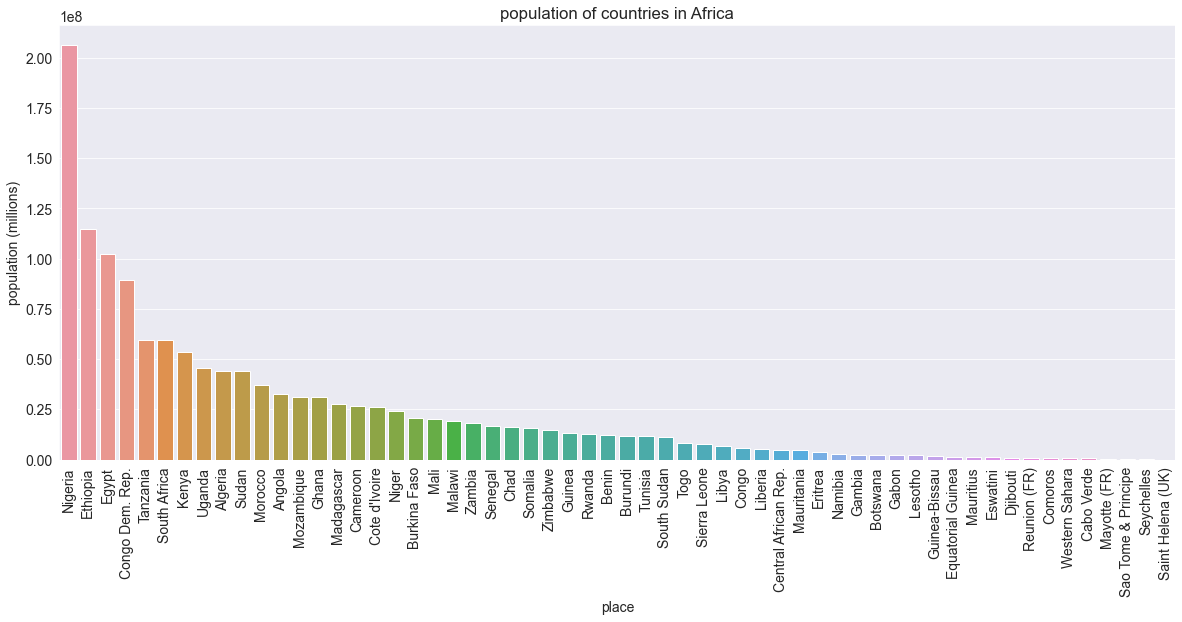

In [14]:
population_df=countries_internet_df.loc[:,['place','population']].copy()
population_df.sort_values('population',ascending=False,inplace=True)

plt.title('population of countries in Africa')
plt.xticks(rotation=90)
sns.barplot(x='place',y='population',data=population_df).set(ylabel='population (millions)');
plt.show()

Nigeria has the highest population of more than 200 million followed by Ethiopia. Let's visualize that with a graph

It appears that Nigeria has a disproportionately high population as compared to other countries. Countries like Western Sahara and Seychelles have very small populations in their thousands

### Internet usage in the 2000s

Let's see a graph showing the population of internet users in the 2000s

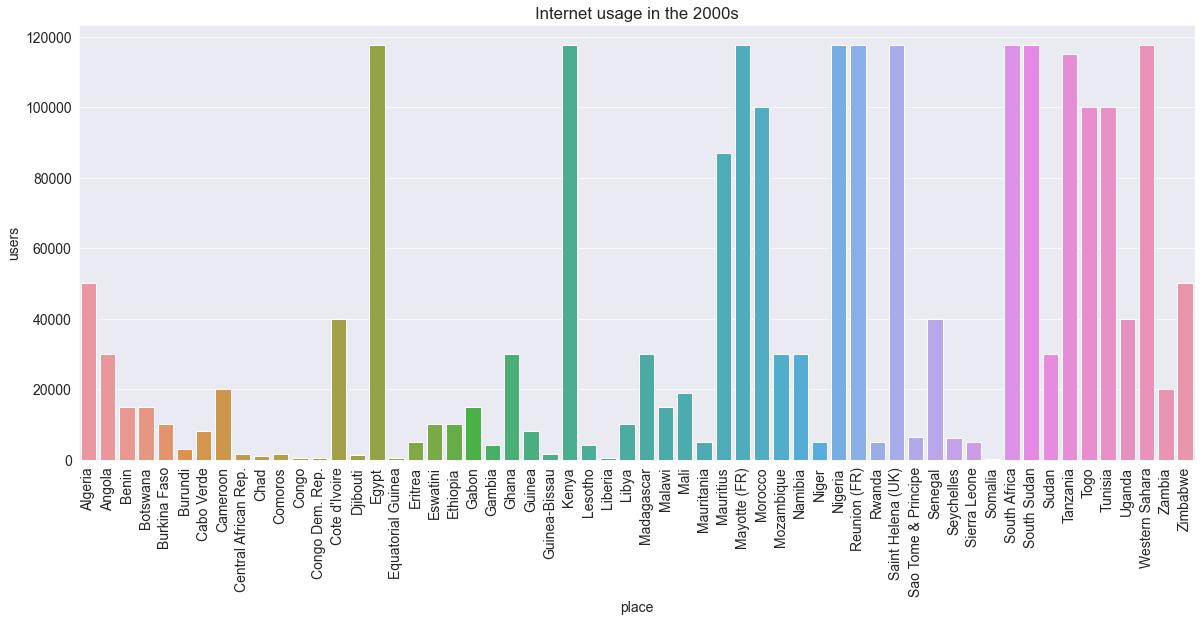

In [15]:
internet_use_2000_df=countries_internet_df.loc[:,['place','internet_users_2000']].copy()
plt.title('Internet usage in the 2000s')
plt.xticks(rotation=90)
sns.barplot(x='place',y='internet_users_2000',data=internet_use_2000_df).set(ylabel='users');
plt.show()

We can see that several countries have had hundreds of internet users in the 2000s

### Internet usage now

We will see the comparison of the current population of internet users to their country's population

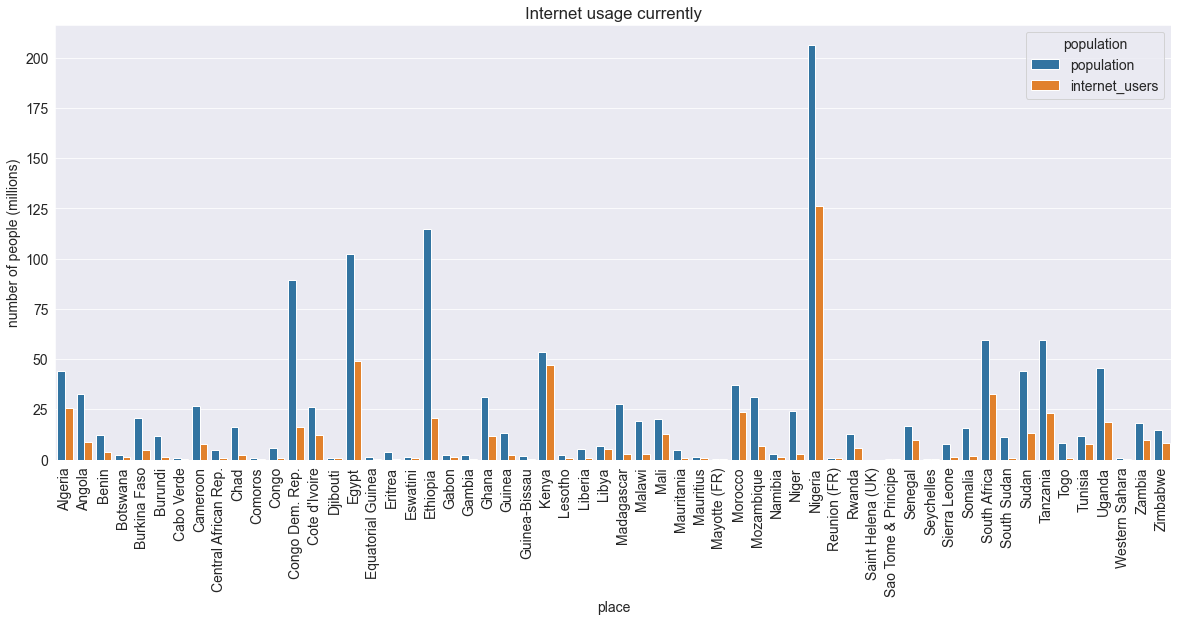

In [16]:
internet_use_df=countries_internet_df.loc[:,['place','population','internet_users']].copy()
internet_use_df=internet_use_df.melt('place',var_name='population',value_name='number_of_people')
internet_use_df.number_of_people=pd.to_numeric(internet_use_df.number_of_people)
internet_use_df.number_of_people=internet_use_df.number_of_people/1000_000
plt.title('Internet usage currently')
plt.xticks(rotation=90)
sns.barplot(x='place',y='number_of_people',hue='population',data=internet_use_df).set_ylabel('number of people (millions)');
plt.show()

We still see that Nigeria has the higest number of internet users disproportionately and also the highest population overall. Follwed by Egypt and Kenya but Kenya has the highest number of iternet users relative to it's current population

### Internet penetration

We will now see the penetration of internet use for each country

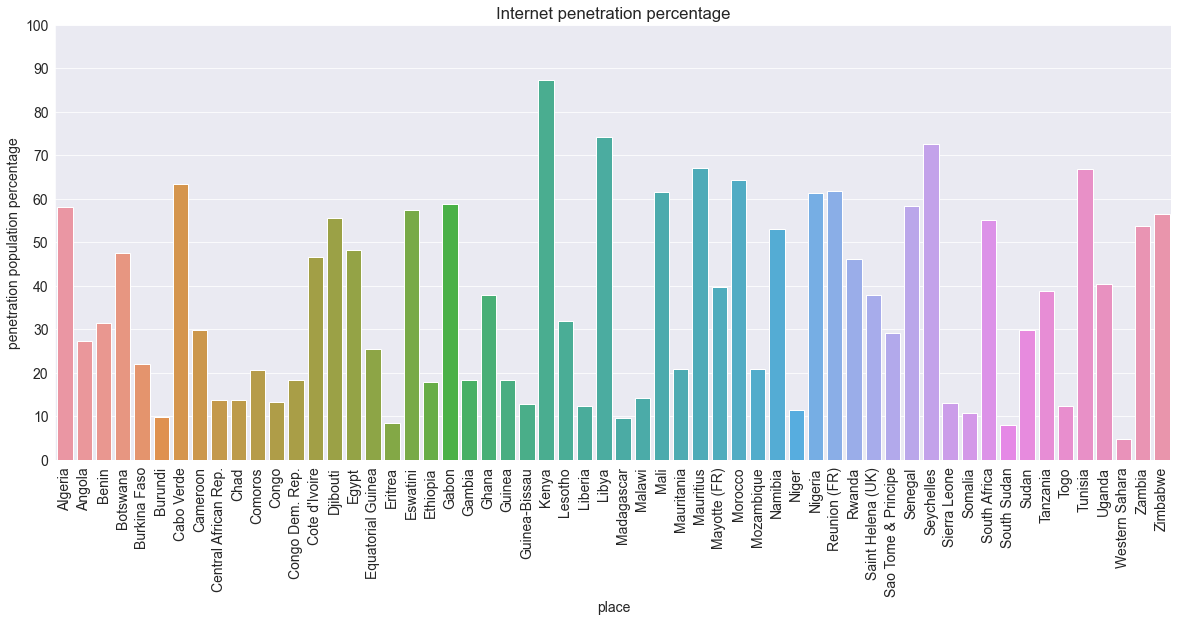

In [17]:
internet_penetration_df=countries_internet_df.loc[:,['place','penetration_population_percentage']].copy()
internet_use_df.number_of_people=pd.to_numeric(internet_use_df.number_of_people)
plt.title('Internet penetration percentage')
plt.xticks(rotation=90)
barplot=sns.barplot(x='place',y='penetration_population_percentage',data=internet_penetration_df)
barplot.set_ylabel('penetration population percentage')
barplot.set_yticks(np.arange(0,101,10));
plt.show()

Almost all of Kenya population have some form of access to the internet followed by Seychelles which is due to its small population. Uganda also has a high population of internet users and Nigeria has more than 50% of its population using the internet. Next, we will see the rate of internet growth for each country from 2000 to now

### Internet growth

Let's visualize the growth of the internet use of each country from 2000 to now

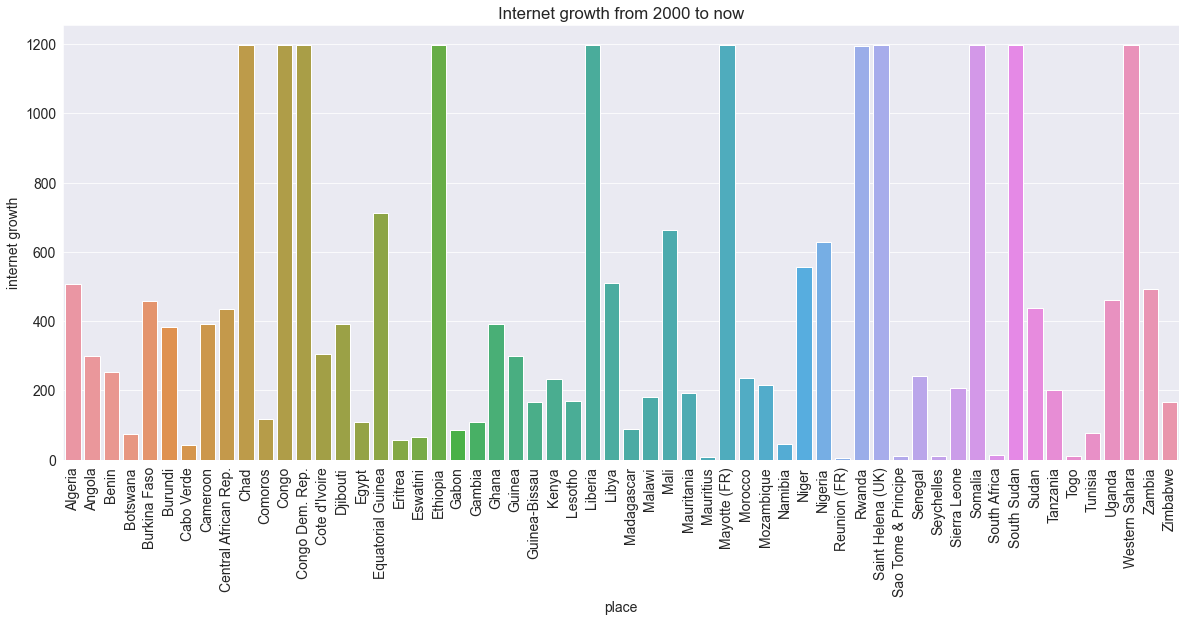

In [18]:
internet_growth_df=countries_internet_df.loc[:,['place','internet_growth_percentage']].copy()
internet_growth_df.internet_growth_percentage=internet_growth_df.internet_growth_percentage/100
plt.title('Internet growth from 2000 to now')
plt.xticks(rotation=90)
sns.barplot(x='place',y='internet_growth_percentage',data=internet_growth_df).set_ylabel('internet growth');
plt.show()

Most countries internet users have increased hundreds of times their previous sizes.

### Facebook subcribers

For our final descriptive visualization, I will compare the number of facebook subsribers to the current population of each country. I will create two graphs with the second one excluding countries with populations in the 75th percentile in order to see the countries with smaller populations

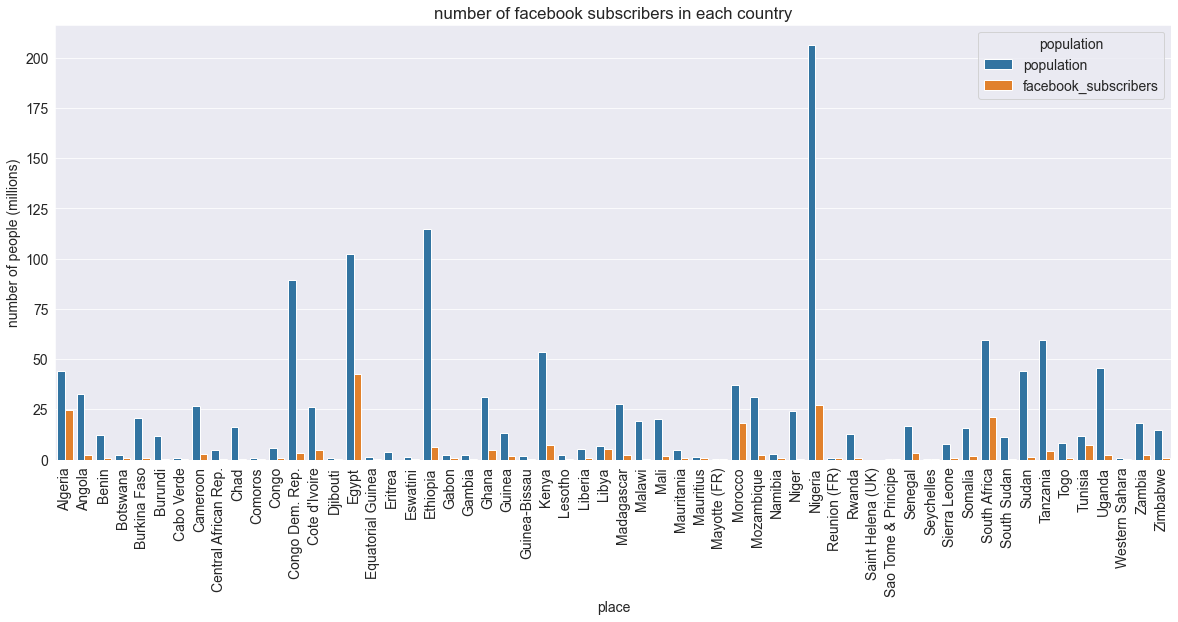

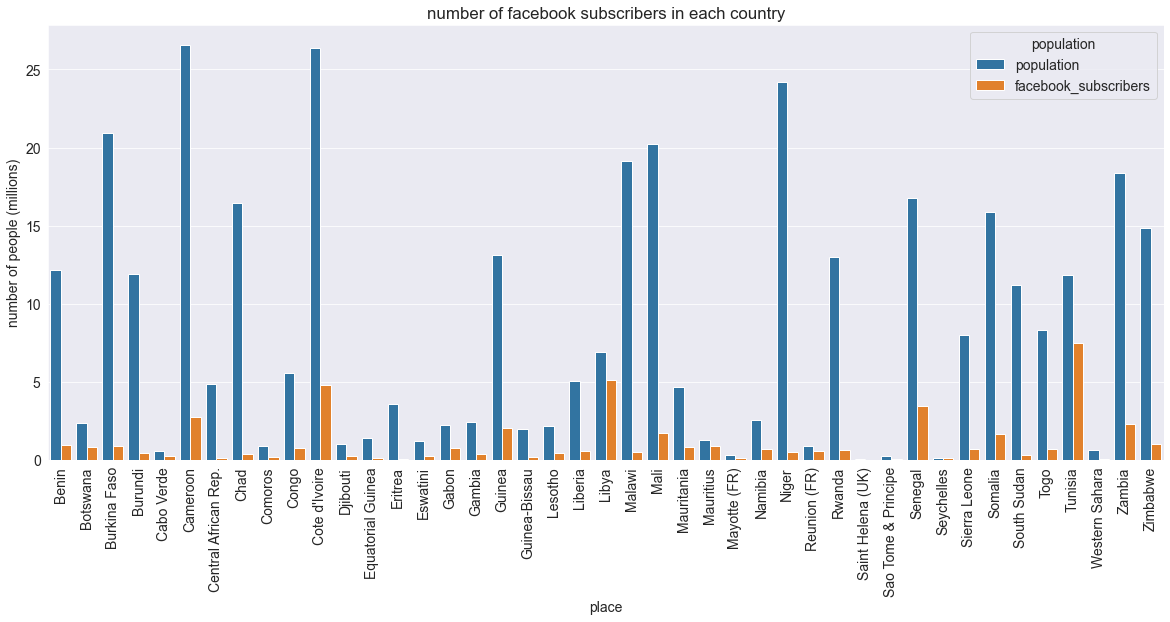

In [19]:
facebook_df=countries_internet_df.loc[:,['place','population','facebook_subscribers']].copy()
facebook_df=facebook_df.melt('place',var_name='population',value_name='number_of_people')
facebook_df.number_of_people=pd.to_numeric(facebook_df.number_of_people)
facebook_df.number_of_people=facebook_df.number_of_people/1000_000
plt.title('number of facebook subscribers in each country')
plt.xticks(rotation=90)
sns.barplot(x='place',y='number_of_people',hue='population',data=facebook_df).set_ylabel('number of people (millions)');
plt.show()

facebook_df=countries_internet_df.loc[:,['place','population','facebook_subscribers']].copy()
outlier=facebook_df.population.quantile(0.75)
facebook_df.drop(facebook_df[facebook_df.population>=outlier].index,inplace=True)
facebook_df=facebook_df.melt('place',var_name='population',value_name='number_of_people')
facebook_df.number_of_people=pd.to_numeric(facebook_df.number_of_people)
facebook_df.number_of_people=facebook_df.number_of_people/1000_000
plt.title('number of facebook subscribers in each country')
plt.xticks(rotation=90)
sns.barplot(x='place',y='number_of_people',hue='population',data=facebook_df).set_ylabel('number of people (millions)');
plt.show()

It appears that number of facebook subscribers in each country is huge some even more half of their total population as in the cases of Tunisia and Libya

### Africa and the rest of the world

Finally, let's see a comparison of Africa and the rest of the world

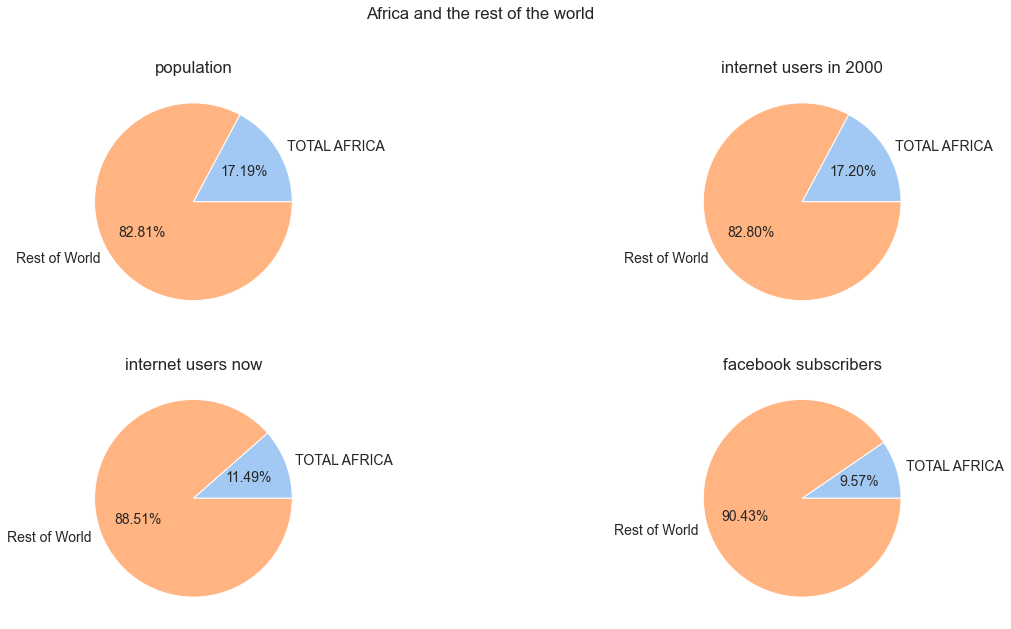

In [20]:
africa_world_df=general_info_df.drop(60)

fig=plt.figure(figsize=(20,10))
plt.suptitle('Africa and the rest of the world')
colors=sns.color_palette('pastel')

ax1=plt.subplot2grid((2,2),(0,0))
plt.title('population')
plt.pie(x='population',labels='place',data=africa_world_df,colors=colors,autopct='%.2f%%');

ax1=plt.subplot2grid((2,2),(0,1))
plt.title('internet users in 2000')
plt.pie(x='internet_users_2000',labels='place',data=africa_world_df,colors=colors,autopct='%.2f%%');

ax1=plt.subplot2grid((2,2),(1,0))
plt.title('internet users now')
plt.pie(x='internet_users',labels='place',data=africa_world_df,colors=colors,autopct='%.2f%%');

ax1=plt.subplot2grid((2,2),(1,1))
plt.title('facebook subscribers')
plt.pie(x='facebook_subscribers',labels='place',data=africa_world_df,colors=colors,autopct='%.2f%%');

## Asking and Answering Questions

In this section, I will try to answer some relevant questions using the dataset

### Which countries internet users are more than half their populations?

Let's see if any, countries whose internet users are more than half their total populations

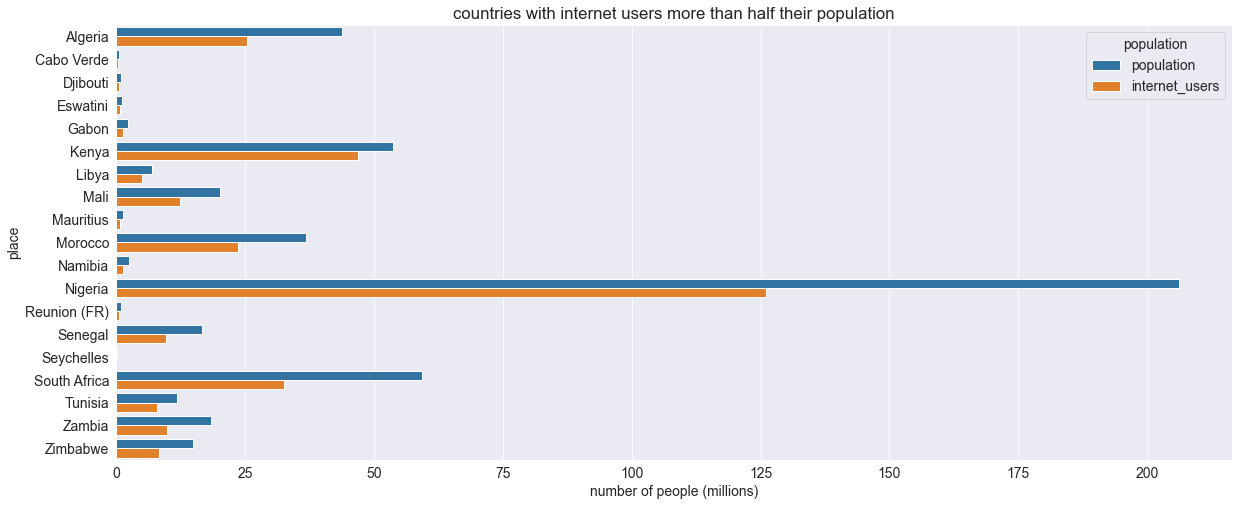

In [21]:
countries_internet_half_df=countries_internet_df.loc[countries_internet_df.internet_users>=countries_internet_df.population/2,['place','population','internet_users']].copy()

countries_internet_half_df=countries_internet_half_df.melt('place',var_name='population',value_name='number_of_people')
countries_internet_half_df.number_of_people=pd.to_numeric(countries_internet_half_df.number_of_people)
countries_internet_half_df.number_of_people=countries_internet_half_df.number_of_people/1000_000
plt.title('countries with internet users more than half their population')
sns.barplot(y='place',x='number_of_people',hue='population',data=countries_internet_half_df).set_xlabel('number of people (millions)');
plt.show()

We have several countries whose internet users are more than have their total population including the populous Nigeria

### What is the comparison between the total number of internet users and facebook subscribers?

Let's see a comparison between the total number of internet users and facebook subscribers

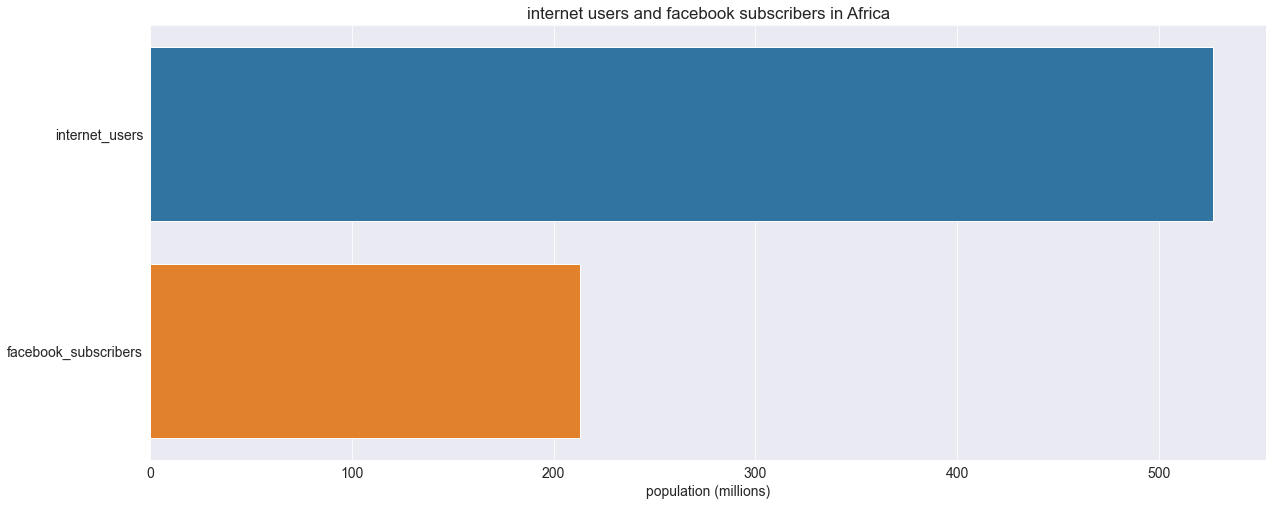

In [22]:
africa_df=general_info_df.iloc[0,[3,6]].copy()
plt.title('internet users and facebook subscribers in Africa')
barplot=sns.barplot(y=africa_df.index,x=africa_df.values/10_000_00);
barplot.set_xlabel('population (millions)')
plt.show()

### Is there a correlation between internet users size and facebook subscribers?

Let's create a scatterplot to see if there is a correlation between the number of facebook subscribers and its internet users. I will only use populations below the 75 percentile to prevent outliers from skewing the result

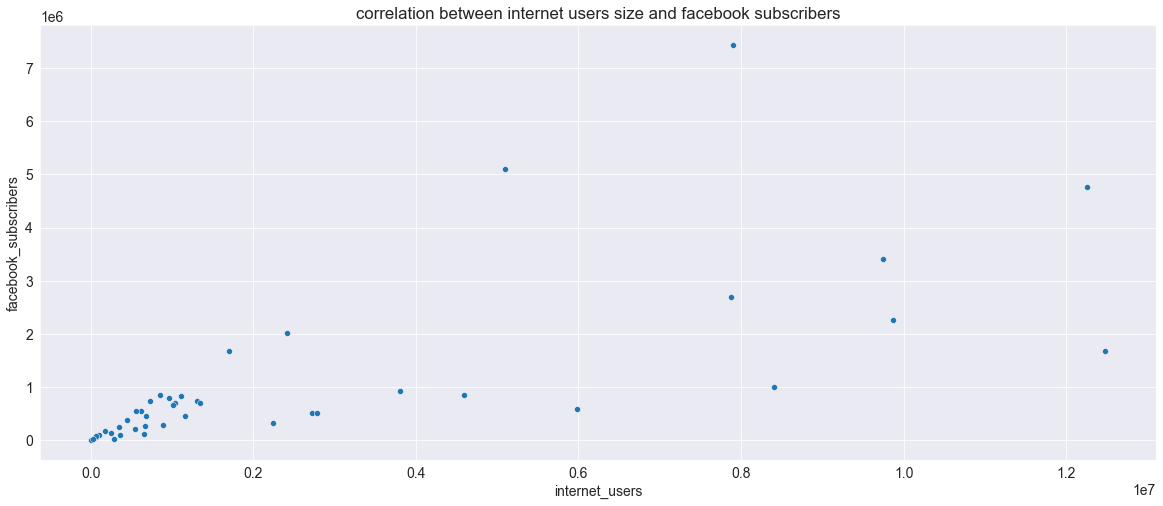

In [23]:
internet_facebook_df=countries_internet_df[countries_internet_df.population<=countries_internet_df.population.quantile(0.75)].copy()
plt.title('correlation between internet users size and facebook subscribers')
sns.scatterplot(x='internet_users',y='facebook_subscribers',data=internet_facebook_df,palette='pastel');

Judging by the alignment of the data points, it appear that there is a correlation between the number of internet users a country has and its facebook subscribers

## Inferences and Conclusion

There was an exponetial growth in the number of internet users for almost all countries in Africa from 2000s to now. There is also huge number of facebook subscribers in Africa close to half its current population. It also appears that this trend will continue for the coming year due to awareness and utilization of internet services in business and communication, people are also understanding the potential of internet use and how it might improve their lives

## References and Future Work

I aim to do a more detailed analysis of internet activity in Africa by having more variables for each country for example, average time spent using the internet, amount of data used for surfing the internet, most used form of the device, most used social media etc

This dataset is gotten from www.internetworldstats.com

In [24]:
import jovian

<IPython.core.display.Javascript object>

In [25]:
project_name = 'analysis-of-africa-internet-usage'
africa_internet_users = 'AfricaInternetUsers.csv'

In [26]:
jovian.commit(project=project_name,files=[africa_internet_users])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Error: Failed to read the Jupyter notebook. Please re-run this cell to try again. If the issue persists, provide the "filename" argument to "jovian.commit" e.g. "jovian.commit(filename='my-notebook.ipynb')"


In [27]:
jovian.commit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Error: Failed to read the Jupyter notebook. Please re-run this cell to try again. If the issue persists, provide the "filename" argument to "jovian.commit" e.g. "jovian.commit(filename='my-notebook.ipynb')"
